In [1]:
import os
import sys
import subprocess
import datetime as dt
import itertools
import numpy as np
import xarray as xr
from dask.distributed import Client, LocalCluster
import dask.array as da
import matplotlib.pyplot as plt
from MHW_daily_calcs import workdir, mdirC5, fnameCanESMClim

In [2]:
workdir='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/'
mdirC5='/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/data/predictions/cansipsv3_daily/CanESM5'

In [3]:
fnameCanESMAnomByLead=lambda mdir, climyfirst, climylast, ilead, istartlat: f"{mdir}/byLead/anomByLead_cwao_CanESM5.1p1bc-v20240611_hindcast_C{climyfirst:04}_{climylast:04}_L{ilead:03}_j{istartlat:03}_ocean_1d_surface_tso.nc"
fnameCanESMAnomDetrByLeadIndiv=lambda mdir, climyfirst, climylast, ilead, istartlat: f"{mdir}/byLeadDetrIndiv/anomDetrByLead_cwao_CanESM5.1p1bc-v20240611_hindcast_C{climyfirst:04}_{climylast:04}_L{ilead:03}_j{istartlat:03}_ocean_1d_surface_tso.nc"
fnameCanESMAnomDetrByLead=lambda mdir, climyfirst, climylast, ilead, istartlat: f"{mdir}/byLeadDetr/anomDetrByLead_cwao_CanESM5.1p1bc-v20240611_hindcast_C{climyfirst:04}_{climylast:04}_L{ilead:03}_j{istartlat:03}_ocean_1d_surface_tso.nc"

In [8]:
climyrs=[1993,2023]

In [13]:
cm1=plt.get_cmap('jet')
cm2=plt.get_cmap('Grays')
import matplotlib as mpl
normalize = mpl.colors.Normalize(vmin=0, vmax=19)

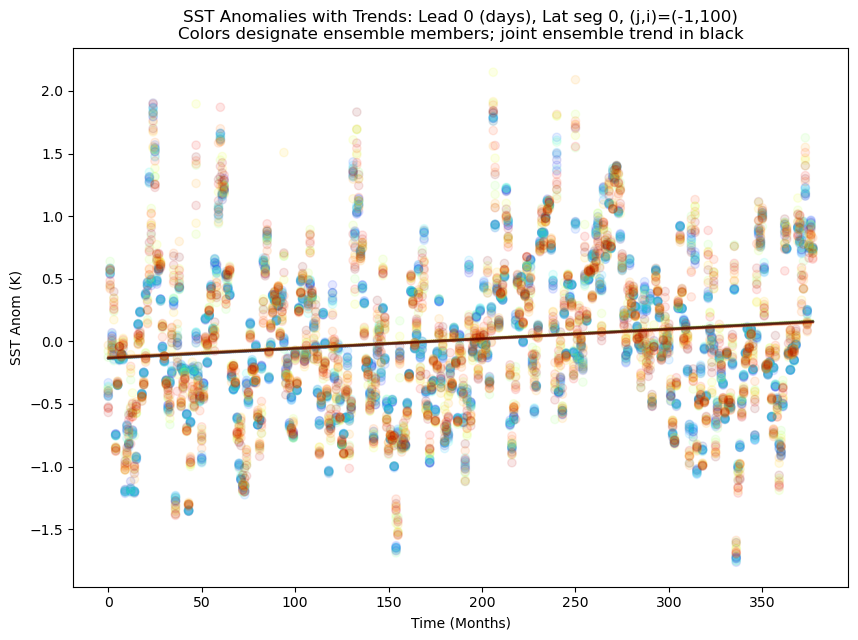

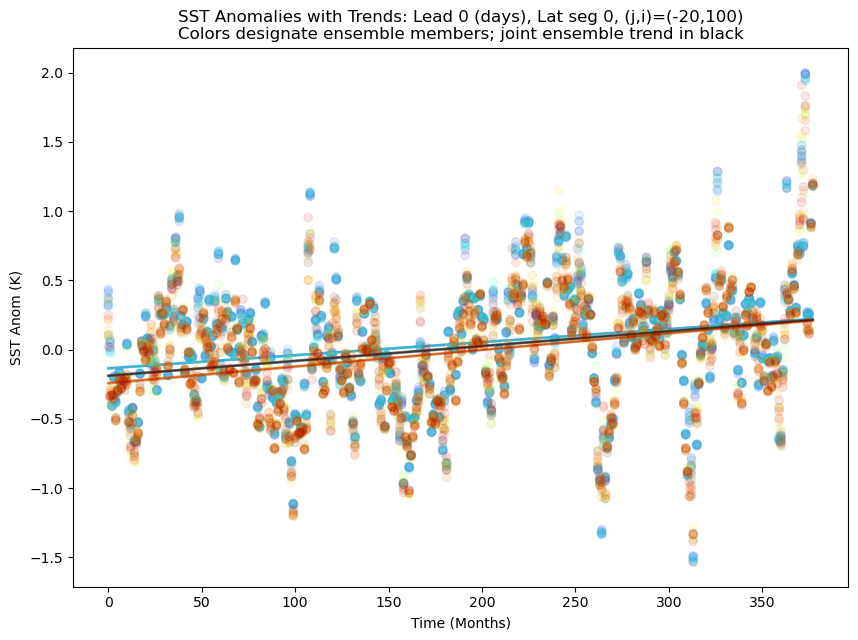

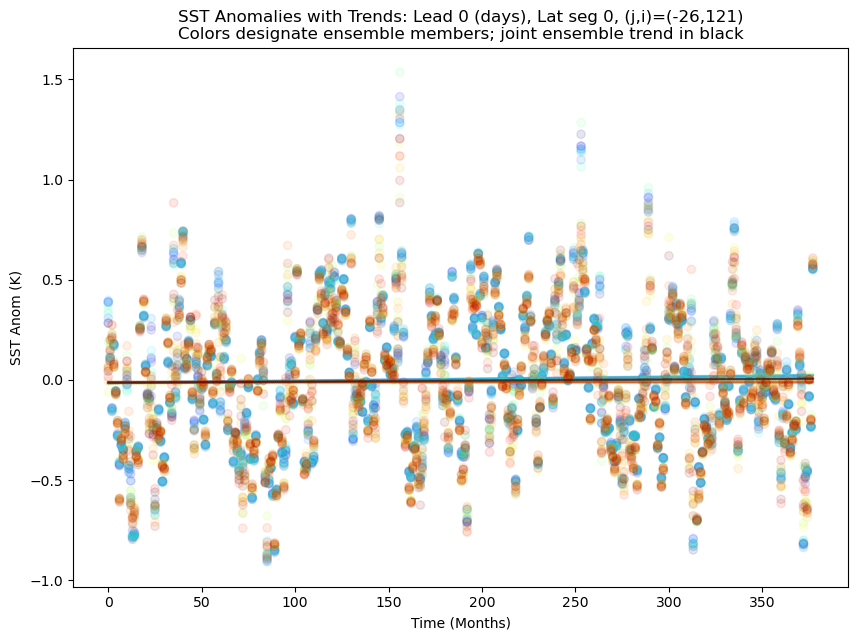

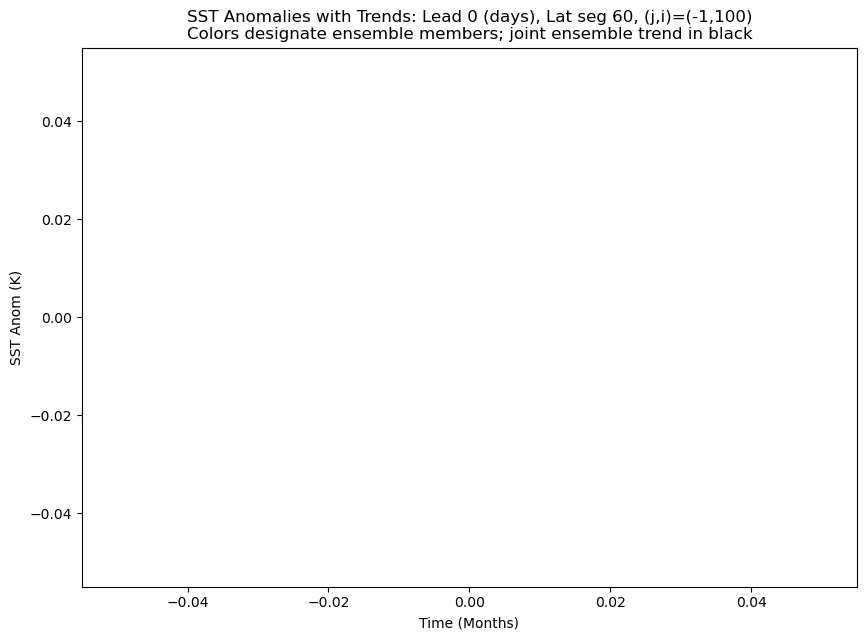

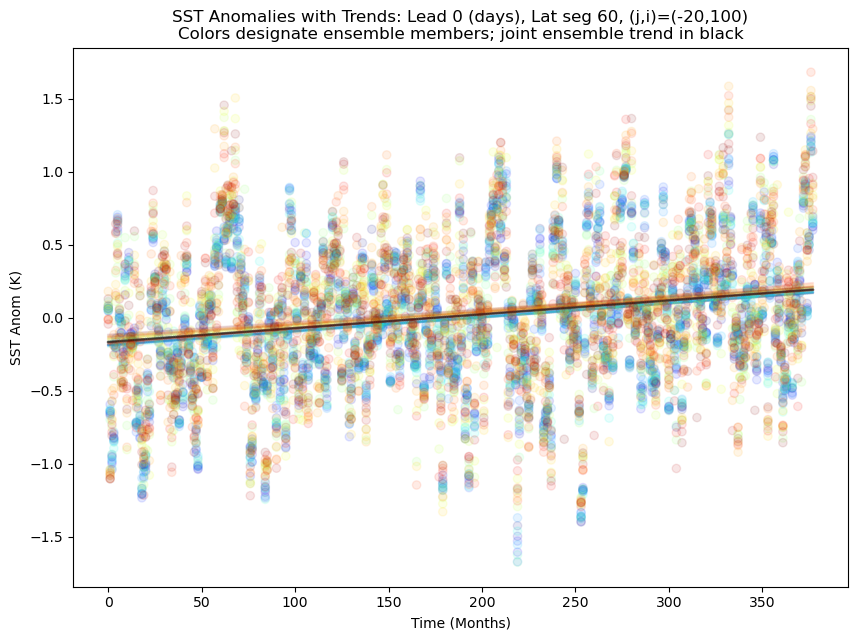

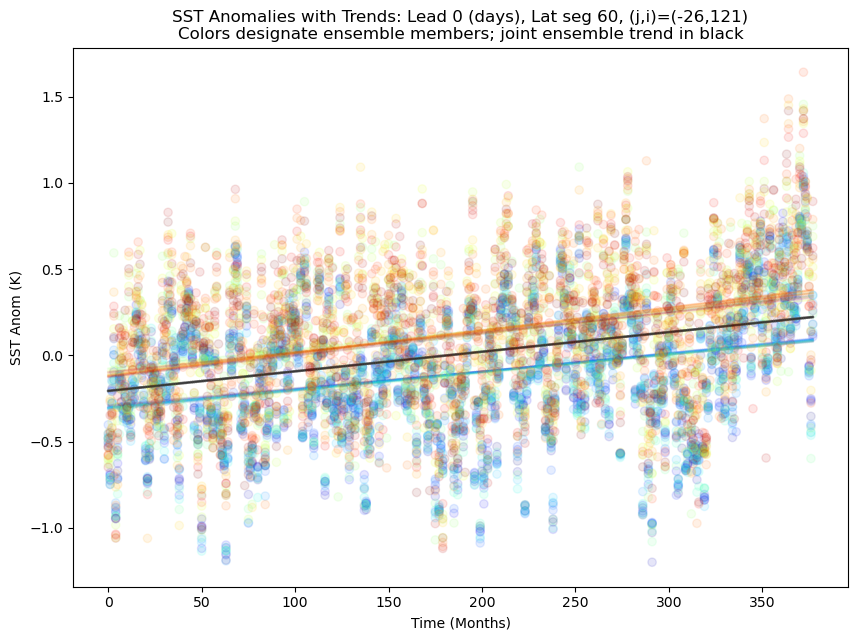

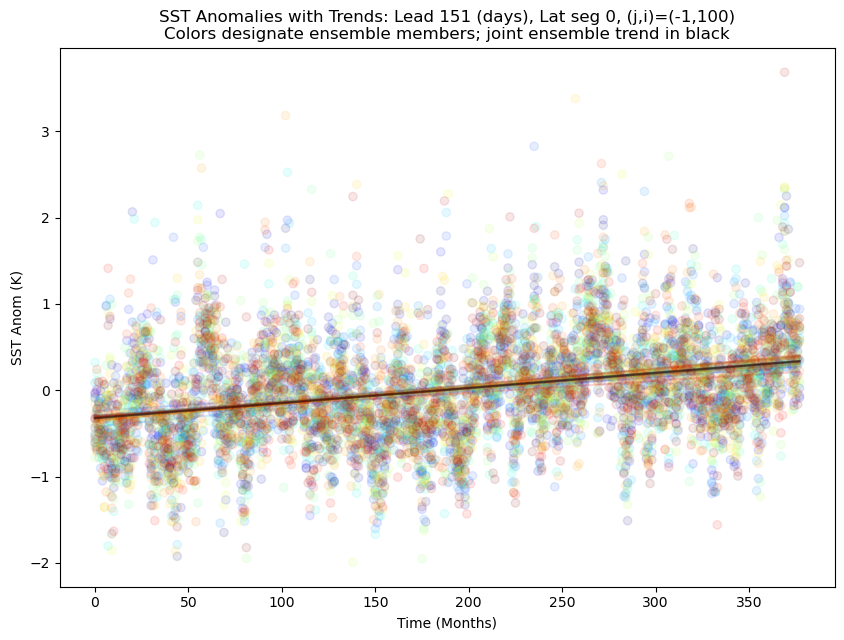

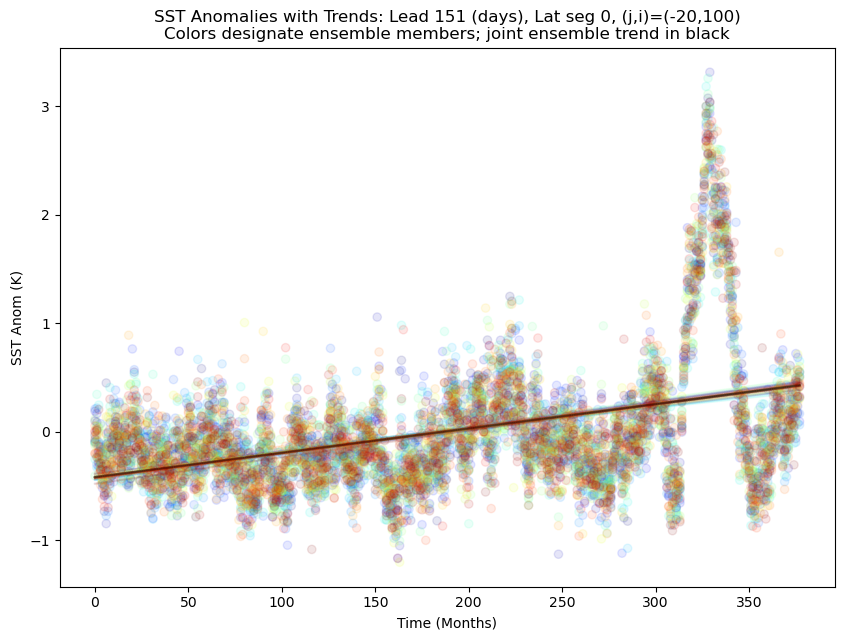

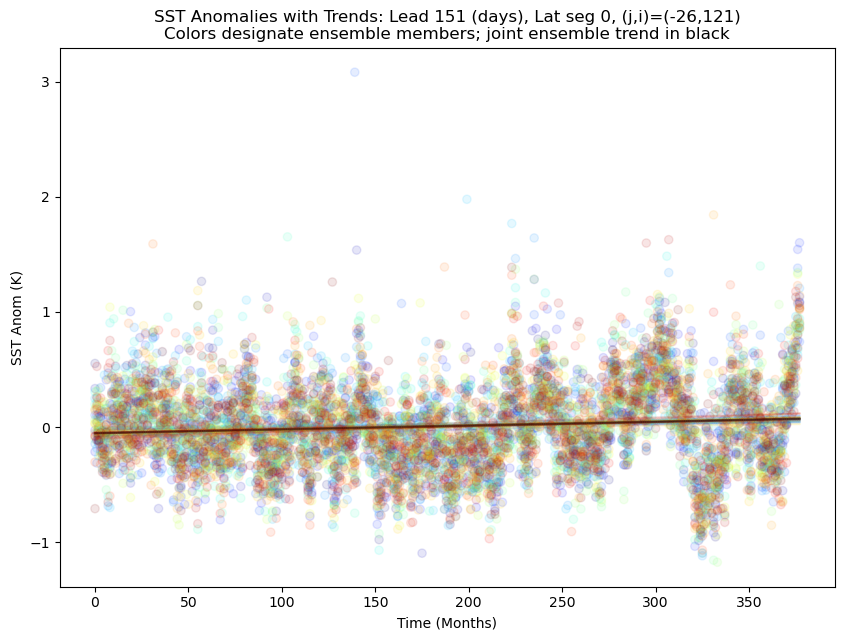

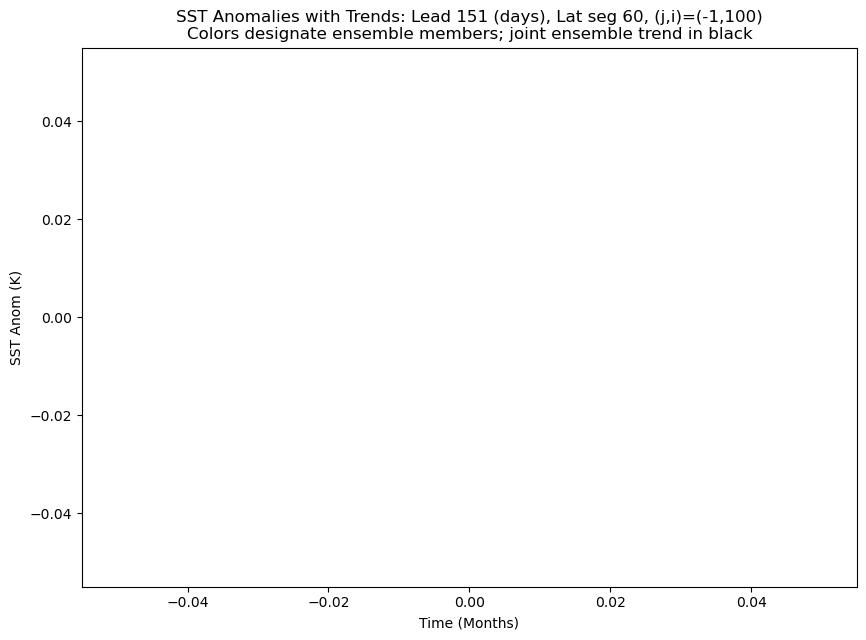

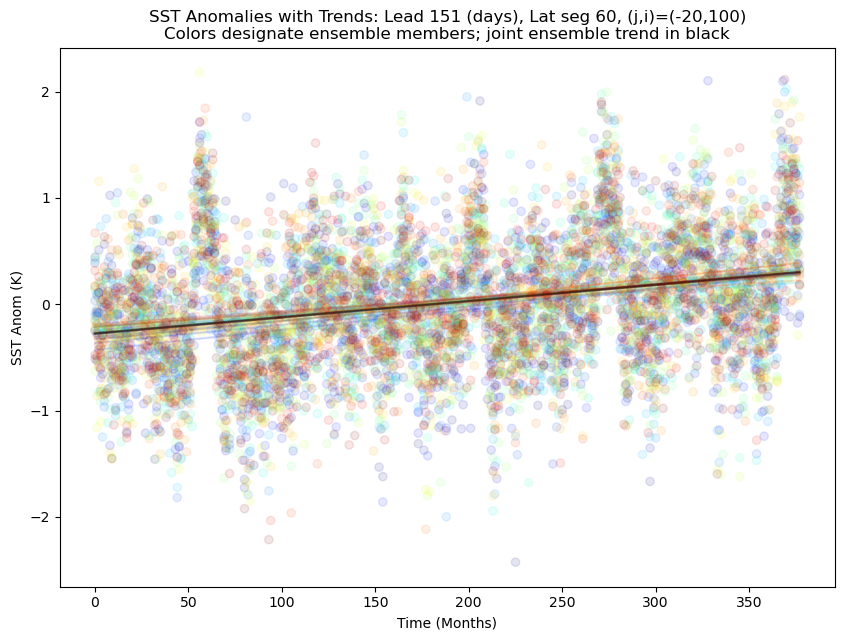

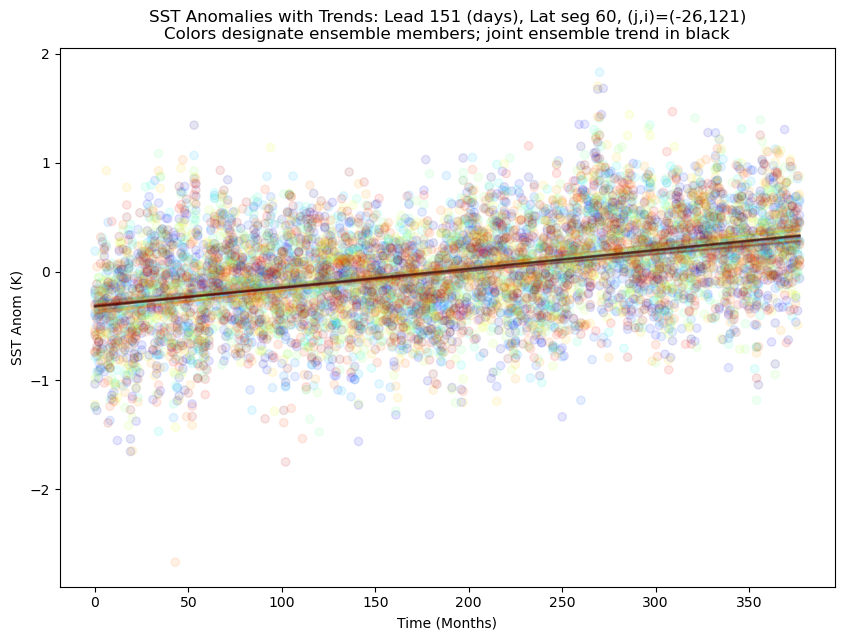

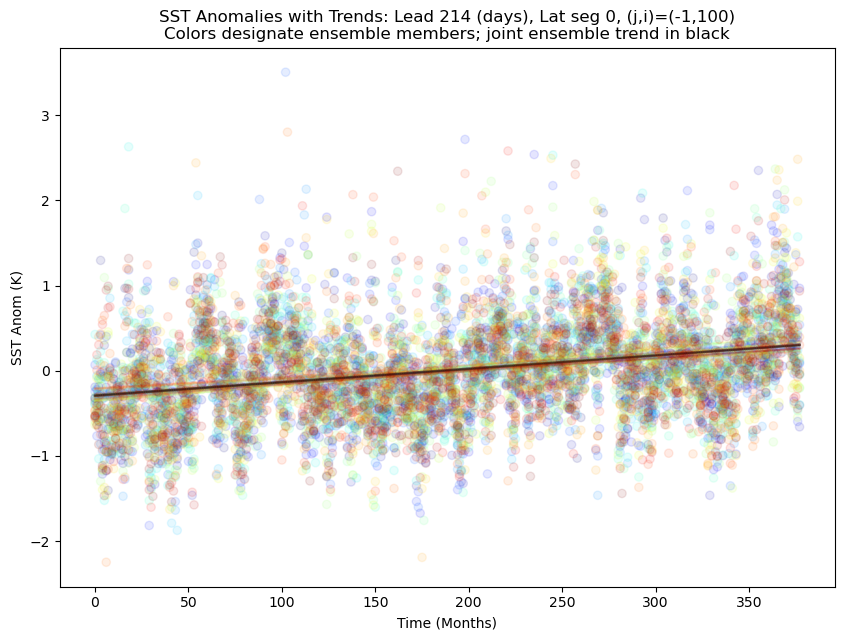

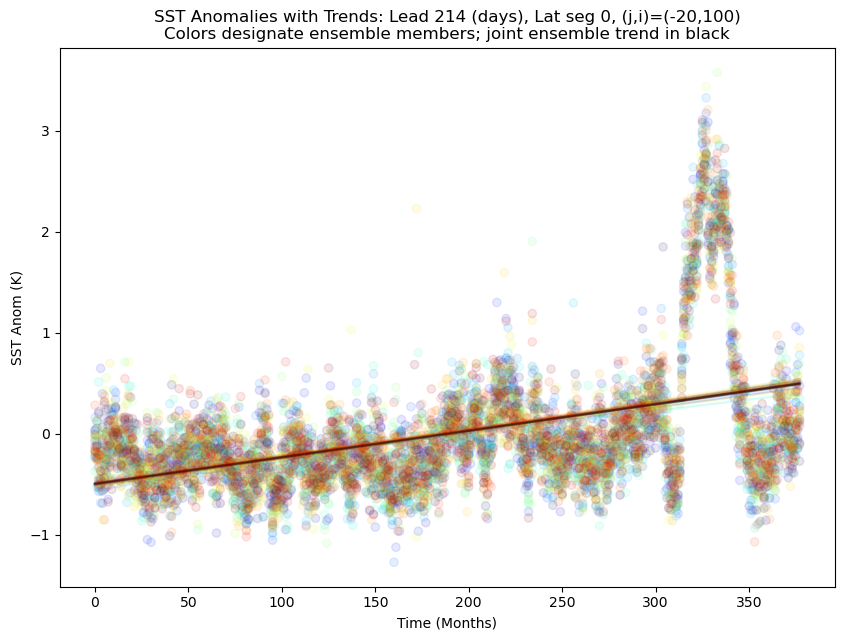

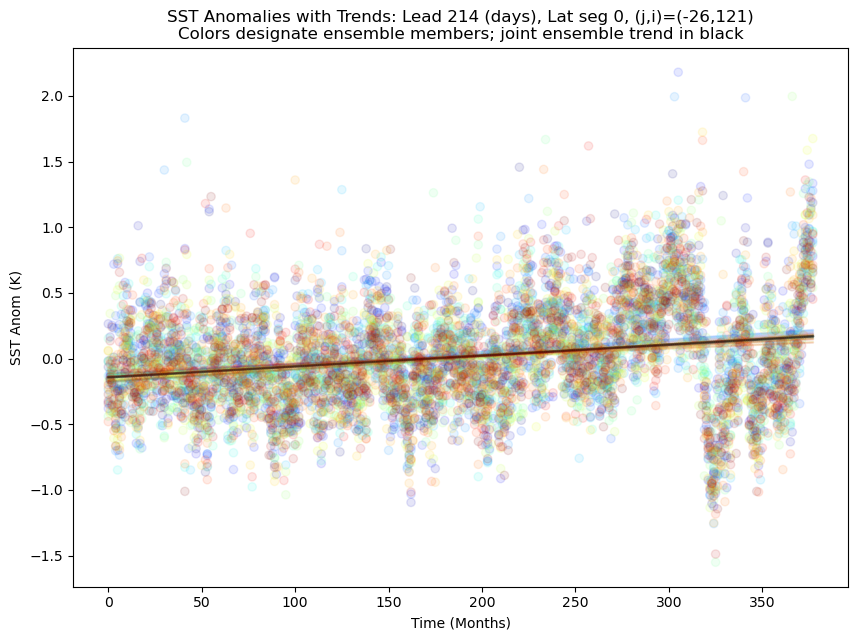

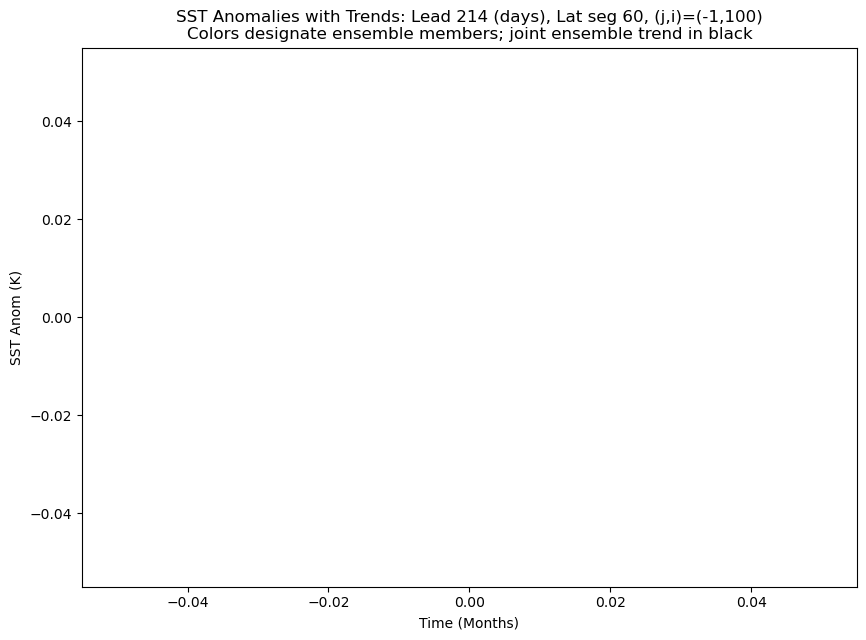

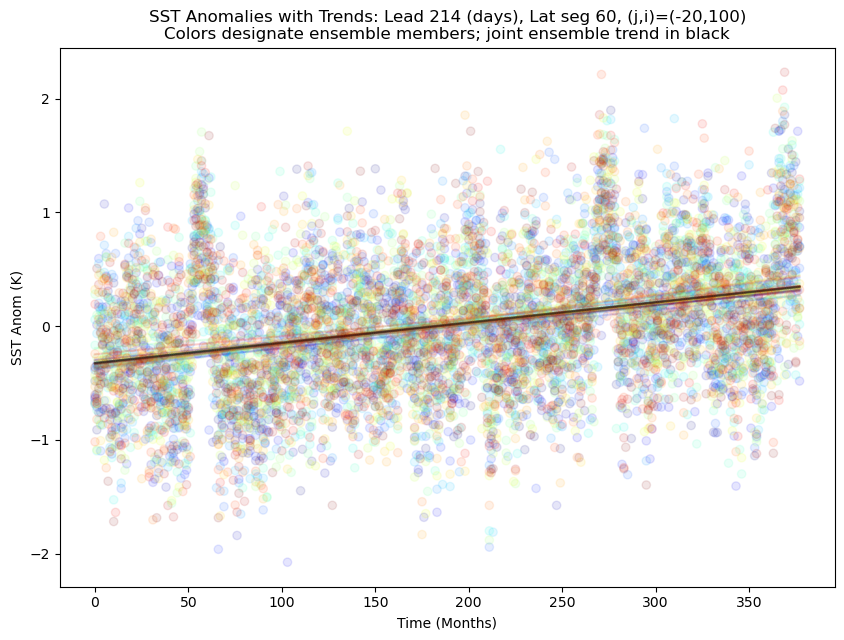

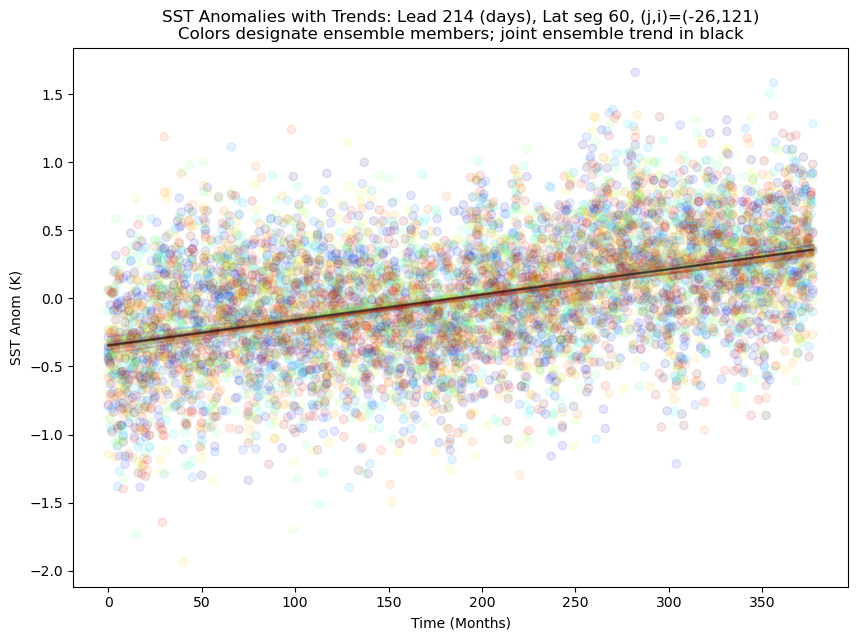

In [16]:
for ilead in [0,151,214]:
    for jj in (0,60):
        f0=xr.open_dataset(fnameCanESMAnomByLead(workdir, climyrs[0], climyrs[-1], ilead, jj),decode_times=False)
        fI=xr.open_dataset(fnameCanESMAnomDetrByLeadIndiv(workdir, climyrs[0], climyrs[-1], ilead, jj),decode_times=False)
        fP=xr.open_dataset(fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj),decode_times=False)
        for ji in [(-1,100),(-20,100),(-26,121)]:
            j,i=ji
            L=f0.sst_an.shape[0]
            fig,ax=plt.subplots(1,1,figsize=(10,7))
            for ii in range(0,20):
                ax.scatter(np.arange(0,L),f0.sst_an[:,ii,j,i],c=ii*np.ones((1,L)),cmap=cm1,norm=normalize,alpha=.1)
                ax.scatter(np.arange(0,L),f0.sst_an[:,ii,j,i]-fI.sst_an[:,ii,j,i],c=ii*np.ones((1,L)),s=1,cmap=cm1,norm=normalize,alpha=.1,)
                ax.scatter(np.arange(0,L),f0.sst_an[:,ii,j,i]-fP.sst_an[:,ii,j,i],c=ii*np.ones((1,L)),s=1,cmap=cm2,norm=normalize,alpha=.1,)
                ax.set_title(f'SST Anomalies with Trends: Lead {ilead} (days), Lat seg {jj}, (j,i)=({j},{i})\n'
                            f'Colors designate ensemble members; joint ensemble trend in black')
                ax.set_xlabel('Time (Months)')
                ax.set_ylabel('SST Anom (K)')
        f0.close()
        fI.close()
        fP.close()